<a href="https://colab.research.google.com/github/francomanca93/fundamentos-practicos-de-machine-learning/blob/main/4.k-means/k_means_sklearn_clustering_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K means en Scikit Learn

## Cargando el data set de Iris

Tenemos 3 especies Virginia, Versicolo y Setosa. Los grupos que querremos encontrar serán de estas especies.

Sabemos que hay 50 muestras de cada especie y tenemos como dato el largo y el ancho del sépalo y del pétalo.

Vamos a entrenar a nuestro algoritmo a partir de las similitudes que tenemos.

Lo importante es saber cuales de ellos se acercan mas hacia las **similitudes** y que nos cree justamente los **centroides** correspondiente, que es lo que hace **K-Means**.



In [1]:
from sklearn.cluster import KMeans
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()

In [3]:
X_iris = iris.data
Y_iris = iris.target # no utilizaremos esta etiqueta para entrenar

In [4]:
x = pd.DataFrame(iris.data, columns= iris.feature_names)
y = pd.DataFrame(iris.target, columns=['Target'])
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


Text(0, 0.5, 'Petal Width')

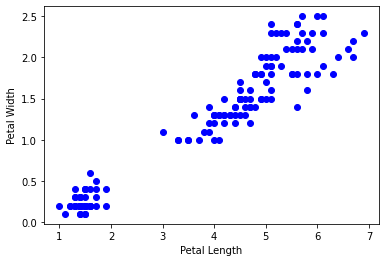

In [5]:
plt.scatter(x['petal length (cm)'], x['petal width (cm)'], c='blue')
plt.xlabel('Petal Length', fontsize = 10)
plt.ylabel('Petal Width', fontsize = 10)

## Construcción y evaluación del modelo con K-Means

Vamos a entrenar el modelo y posteriormente ponerlo a prueba.

> **n_cluster**: Es nuestro K. Este valor nos va a permitir generar los centroides en nuestro plano XY. Cada grupo creado estará definido por los n_cluster.
>
> **max_iter**: Este parámetro nos dice cuantas veces vamos a mover/iterar K hasta encontrar las distancias mas cercana a cada unos de los conjunto de puntos en el plano XY

### Metodo del codo

El método del codo se basa en la suma de los cuadrados de las distancias de cada elemento de datos con su centroide correspondiente y se denota de la siguiente manera:

![](https://imgur.com/e3V6Zxd.png)

Donde WCSS es la suma de los cuadrados de las distancias y se refiere a Within-Cluster-Sum-of-Squares, Yi es el centroide del elemento o dato Xi y n el total de datos en la muestra.

Se puede ver con graficamente el proceso completo de como se realiza  el método del codo en este articulo, [k-Means Clustering con Python](https://www.jacobsoft.com.mx/es_mx/k-means-clustering-con-python/).

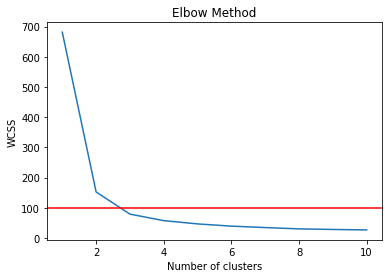

In [6]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, max_iter=1000, random_state=0) # Aca definimos el modelo
    kmeans.fit(x) # Aca utilizamos los datos
    wcss.append(kmeans.inertia_) # 
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.axhline(100,color='r',)
plt.show()

### Construimos el modelo

In [7]:
model = KMeans(n_clusters=3, max_iter=1000)
model.fit(x)
y_label = model.labels_

In [8]:
y_kmeans = model.predict(x)
print('Predicciones ', y_kmeans)

Predicciones  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


### Evaluamos el modelo

Importamos metrics, para evaluar algunas metricas. En este caso el **accuracy** o precisión. 

In [9]:
from sklearn import metrics

accuracy = metrics.adjusted_rand_score(Y_iris, y_kmeans)
print(accuracy)

0.7302382722834697


## Graficación del modelo

<function matplotlib.pyplot.show>

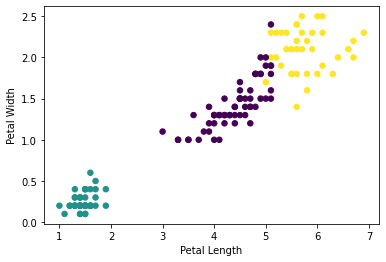

In [10]:
plt.scatter(x['petal length (cm)'], x['petal width (cm)'], c= y_kmeans, s = 30)
plt.xlabel('Petal Length', fontsize = 10)
plt.ylabel('Petal Width', fontsize = 10)
plt.show